In [1]:
import h2o
import pandas as pd
import random
from random import randint

In [2]:
#Generate random dataset for housing prices

def list_integer(no_of_rows, min, max):
    x_list = []
    for i in range(no_of_rows) :
        x_list.append(randint(min, max))
    return(x_list)

def list_float(no_of_rows, min, max):
    x_list = []
    for i in range(no_of_rows) :
        x_list.append(round(random.uniform(min,max),2))
    return(x_list)

def list_random_pick(no_of_rows, pick_list) :
    x_list = []
    for i in range(no_of_rows) :
        x_list.append(random.choice(pick_list))
    return(x_list)

def list_random_pick(no_of_rows, pick_list) :
    x_list = []
    for i in range(no_of_rows) :
        x_list.append(random.choice(pick_list))
    return(x_list)
    
no_of_rows = 1000
#feature and target columns
train_columns = ['No of BedRooms','Size','No of Floors','Area Code','State','Area Type','Age of Contruction']
df = pd.DataFrame(columns=train_columns)

#create arrays for each column with randomness in price
df['No of BedRooms'] = list_integer(no_of_rows,1,8)
df['Size'] = list_float(no_of_rows,600,2800)
df['No of Floors'] = list_integer(no_of_rows,0,3)
df['Area Code'] = list_integer(no_of_rows,10000,50000)
state_list = ["Arizona","California","Connecticut","Columbia", "Florida", "Georgia","Kansas","New York","Texas","Washington"]
df['State'] = list_random_pick(no_of_rows,state_list)
area_type_list = ["Upscale","Midscale","Downscale","Commercial"]
df['Area Type'] = list_random_pick(no_of_rows,area_type_list)
df['Age of Contruction'] = list_integer(no_of_rows,1,15)

#Calculate housing price, add some randomness
df['Price'] = randint(100000, 500000) + df['No of BedRooms']*100 + df['No of Floors']*100 + df['Size']*30 + df['Area Code']*1 - df['Age of Contruction']*300
df.head()

,No of BedRooms,Size,No of Floors,Area Code,State,Area Type,Age of Contruction,Price
0,7,1601.57,1,15815,Florida,Commercial,5,485773.1
1,1,2390.94,1,16514,Georgia,Midscale,9,508353.2
2,4,1048.08,1,42032,Washington,Commercial,2,495985.4
3,8,1842.40,3,34603,New York,Downscale,13,509686.0
4,1,2447.31,3,32305,New York,Upscale,7,526635.3


In [3]:
#print a correlation matrix to validate our data has good amount of relation
print(df.corr())

                    No of BedRooms      Size  No of Floors  Area Code  \
No of BedRooms            1.000000  0.057615      0.029999  -0.033856   
Size                      0.057615  1.000000     -0.040389   0.021444   
No of Floors              0.029999 -0.040389      1.000000  -0.032381   
Area Code                -0.033856  0.021444     -0.032381   1.000000   
Age of Contruction        0.016260  0.012805      0.034052  -0.005449   
Price                     0.040826  0.856778     -0.047421   0.530557   

                    Age of Contruction     Price  
No of BedRooms                0.016260  0.040826  
Size                          0.012805  0.856778  
No of Floors                  0.034052 -0.047421  
Area Code                    -0.005449  0.530557  
Age of Contruction            1.000000 -0.049800  
Price                        -0.049800  1.000000  


In [4]:
#initialize h2o session
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_181"; Java(TM) SE Runtime Environment (build 1.8.0_181-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /Users/anmol/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/c7/lxw5_lpx2018kgdjjfy_m00r0000gn/T/tmps4rwqg_p
  JVM stdout: /var/folders/c7/lxw5_lpx2018kgdjjfy_m00r0000gn/T/tmps4rwqg_p/h2o_anmol_started_from_python.out
  JVM stderr: /var/folders/c7/lxw5_lpx2018kgdjjfy_m00r0000gn/T/tmps4rwqg_p/h2o_anmol_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.5
H2O cluster version age:,21 days and 57 minutes
H2O cluster name:,H2O_from_python_anmol_yip98s
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [5]:
#convert dataframe to h2o frame
data = h2o.H2OFrame(df)

/Users/anmol/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
data.summary()
#check data summary, we can see min, max, mean prices

,No of BedRooms,Size,No of Floors,Area Code,State,Area Type,Age of Contruction,Price
type,int,real,int,int,enum,enum,int,real
mins,1.0,601.78,0.0,10023.0,,,1.0,450207.8
mean,4.514000000000001,1702.20499,1.5079999999999987,29974.887999999974,,,8.122999999999987,501817.3376999996
maxs,8.0,2796.66,3.0,49989.0,,,15.0,549647.4
sigma,2.2845181161511983,630.1105550197893,1.1230303634351109,11451.852915080799,,,4.332509854765671,22340.531548794264
zeros,0,0,253,0,,,0,0
missing,0,0,0,0,0,0,0,0
0,7.0,1601.57,1.0,15815.0,Florida,Commercial,5.0,485773.1
1,1.0,2390.94,1.0,16514.0,Georgia,Midscale,9.0,508353.2
2,4.0,1048.08,1.0,42032.0,Washington,Commercial,2.0,495985.4


In [7]:
#split data in train, valid and testset
train,valid,test = data.split_frame([0.8,0.1])

In [8]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [9]:
mRF = H2ORandomForestEstimator()
mRF.train(train_columns,"Price",train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [10]:
#Get Random Forest model summary
print(mRF.scoring_history())

                timestamp    duration  number_of_trees  training_rmse  \
0     2018-08-30 01:05:01   0.047 sec              0.0            NaN   
1     2018-08-30 01:05:01   0.296 sec              1.0   11204.370998   
2     2018-08-30 01:05:01   0.371 sec              2.0   10535.158025   
3     2018-08-30 01:05:01   0.440 sec              3.0   11592.240760   
4     2018-08-30 01:05:02   0.493 sec              4.0   10858.624512   
5     2018-08-30 01:05:02   0.528 sec              5.0   10692.846992   
6     2018-08-30 01:05:02   0.554 sec              6.0    9801.035965   
7     2018-08-30 01:05:02   0.579 sec              7.0    9614.870848   
8     2018-08-30 01:05:02   0.605 sec              8.0    9168.919572   
9     2018-08-30 01:05:02   0.630 sec              9.0    8898.962874   
10    2018-08-30 01:05:02   0.653 sec             10.0    8242.770213   
11    2018-08-30 01:05:02   0.686 sec             11.0    7867.403112   
12    2018-08-30 01:05:02   0.711 sec             1

In [11]:
#Test initial model performance on test data
mRF.model_performance(test)

# plot training logloss and auc
sh = mRF.score_history()
sh = pd.DataFrame(sh)
sh.plot(x='number_of_trees', y = ['training_deviance'])

In [12]:
#Lets create the model again with validation frame
#We can see we got a better RMSE

mRF_validation_frame = H2ORandomForestEstimator(model_id="mrf_validation_model")
mRF_validation_frame.train(train_columns,"Price",train, validation_frame=valid)
mRF_validation_frame.model_performance(test)

drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 24904009.833267834
RMSE: 4990.391751482826
MAE: 3907.8726190476164
RMSLE: 0.010002517711613762
Mean Residual Deviance: 24904009.833267834


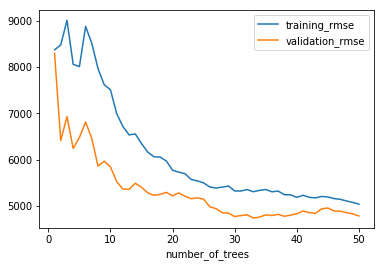

In [13]:
# plot rmse against no of trees, its much more smoother now
sh = mRF_validation_frame.score_history()
sh = pd.DataFrame(sh)
#print(sh)
sh.plot(x='number_of_trees', y = ['training_rmse','validation_rmse'])

In [14]:
#Now lets try to overfit the data with high number of trees
mRF_overfit = H2ORandomForestEstimator(model_id="mrf_overfit",ntrees=1000)
mRF_overfit.train(train_columns,"Price",train, validation_frame=valid)
mRF_overfit.model_performance(test)

drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 21700576.788461637
RMSE: 4658.38778854462
MAE: 3700.3447369047612
RMSLE: 0.009449102066513948
Mean Residual Deviance: 21700576.788461637


In [15]:
print(mRF_overfit.scoring_history())

                  timestamp    duration  number_of_trees  training_rmse  \
0       2018-08-30 01:05:05   0.009 sec              0.0            NaN   
1       2018-08-30 01:05:05   0.048 sec              1.0   16121.884879   
2       2018-08-30 01:05:06   0.068 sec              2.0   13885.935542   
3       2018-08-30 01:05:06   0.077 sec              3.0   12375.731020   
4       2018-08-30 01:05:06   0.112 sec              4.0   11652.739017   
5       2018-08-30 01:05:06   0.142 sec              5.0   10539.956480   
6       2018-08-30 01:05:06   0.155 sec              6.0   10145.683005   
7       2018-08-30 01:05:06   0.167 sec              7.0    9705.427679   
8       2018-08-30 01:05:06   0.180 sec              8.0    9790.274221   
9       2018-08-30 01:05:06   0.200 sec              9.0    9111.250529   
10      2018-08-30 01:05:06   0.212 sec             10.0    8945.798001   
11      2018-08-30 01:05:06   0.225 sec             11.0    8497.639426   
12      2018-08-30 01:05:

[191 rows x 10 columns]


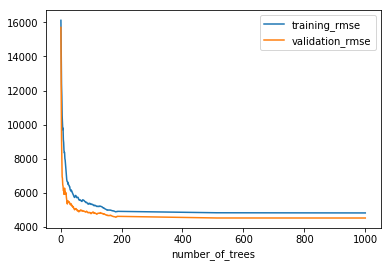

In [16]:
#Highly overfitted with no improvement after 250 trees
sh = mRF_overfit.score_history()
sh = pd.DataFrame(sh)
#print(sh)
sh.plot(x='number_of_trees', y = ['training_rmse','validation_rmse'])

In [17]:
#Now lets try to train with high number of trees and max_depth
mRF_overfit = H2ORandomForestEstimator(model_id="mrf_overfit",ntrees=1000,max_depth=100)
mRF_overfit.train(train_columns,"Price",train, validation_frame=valid)
mRF_overfit.model_performance(test)

drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 20639858.008264724
RMSE: 4543.111049519341
MAE: 3609.966064880952
RMSLE: 0.009206195617586213
Mean Residual Deviance: 20639858.008264724


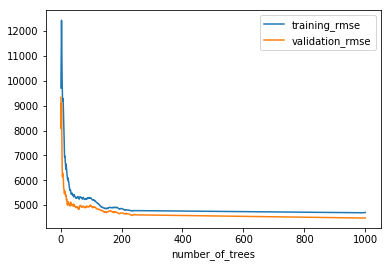

In [18]:
#Even more overfitted data
sh = mRF_overfit.score_history()
sh = pd.DataFrame(sh)
sh.plot(x='number_of_trees', y = ['training_rmse','validation_rmse'])

In [19]:
print(mRF_overfit.scoring_history())

                  timestamp    duration  number_of_trees  training_rmse  \
0       2018-08-30 01:05:18   0.021 sec              0.0            NaN   
1       2018-08-30 01:05:18   0.072 sec              1.0    9713.146317   
2       2018-08-30 01:05:18   0.083 sec              2.0   11138.915521   
3       2018-08-30 01:05:18   0.091 sec              3.0   12432.431917   
4       2018-08-30 01:05:18   0.105 sec              4.0   11183.828473   
5       2018-08-30 01:05:18   0.111 sec              5.0   10061.322395   
6       2018-08-30 01:05:18   0.119 sec              6.0    9410.515663   
7       2018-08-30 01:05:18   0.127 sec              7.0    9185.942621   
8       2018-08-30 01:05:18   0.136 sec              8.0    9281.310554   
9       2018-08-30 01:05:18   0.144 sec              9.0    8929.777625   
10      2018-08-30 01:05:18   0.154 sec             10.0    8384.628237   
11      2018-08-30 01:05:18   0.162 sec             11.0    7734.788539   
12      2018-08-30 01:05:

[248 rows x 10 columns]
